In [36]:
# imported libraries and plottin code 
from os import sys
import random
import torch
from torch import nn, optim
import math
from IPython import display
import torch.functional as F
from matplotlib import pyplot as plt
import numpy as np

RED   = "\033[1;31m"  
BLUE  = "\033[1;34m"
CYAN  = "\033[1;36m"
GREEN = "\033[0;32m"
RESET = "\033[0;0m"
BOLD    = "\033[;1m"
REVERSE = "\033[;7m"

def print_colored_line(color): 
    sys.stdout.write(color)
    print("*="*60)
    sys.stdout.write(RESET)

def print_colored_text(text, color): 
    sys.stdout.write(color)
    print(text)
    sys.stdout.write(RESET)

def set_default(figsize=(10, 10)):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)
    plt.show()


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')


def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)


def show_mat(mat, vect, prod, threshold=-1):
    # Subplot grid definition
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=True,
                                        gridspec_kw={'width_ratios':[5,1,1]})
    # Plot matrices
    cax1 = ax1.matshow(mat.numpy(), clim=(-1, 1))
    ax2.matshow(vect.numpy(), clim=(-1, 1))
    cax3 = ax3.matshow(prod.numpy(), clim=(threshold, 1))

    # Set titles
    ax1.set_title('A: {} \u00D7 {}'.format(mat.size(0), mat.size(1)))
    ax2.set_title('a^(i): {}'.format(vect.numel()))
    ax3.set_title('p: {}'.format(prod.numel()))

    # Plot colourbars
    fig.colorbar(cax1, ax=ax2)
    fig.colorbar(cax3, ax=ax3)

    # Fix y-axis limits
    ax1.set_ylim(bottom=max(len(prod), len(vect)) - 0.5)
    
print_colored_line(BLUE)
print_colored_line(RED)
print_colored_line(BLUE)

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


<h1 style="font-family:verdana;font-size:300%;text-align:center;background-color:#f2f2f2;color:#0d0d0d">Introduction to FeedForward Networks with Pytorch</h1>

<h1 style="font-family:verdana;font-size:150%;text-align:left;color:#993333"> Why Pytorch ? </h1>


<h1 style="font-family:verdana;font-size:120%;text-align:left;color:blue">Pytorch: </h1>
It’s a Python-based scientific computing package, pytorch is: 

<h1 style="font-family:verdana;font-size:150%;text-align:center;background-color:#f2f2f2;color:#993333; border:2px; border-style:solid; border-color:gray; padding: 1em"> Numpy + Autograd + GPU acceleration </h1>

<h1 style="font-family:verdana;font-size:120%;text-align:left;color:blue">Features: </h1>
- Very Pythonic. 
- Dynamic computation graph is easy to understand.  
- Readable code. 
- #1 Framework used in research. 
            

## Basic Pytorch 
- Tensors.  
- Tesnor operations (initalization, math, logical, reshaping and slicing ... etc). 
- Building models torch.nn 
- Concept of computation graph.  
- .backward operation(). 
- Optimizers and optimizers step.  


<h1 style="font-family:verdana;font-size:100%;text-align:center;color:blue"> The Tensor is the basic data structure of Pytorch. Pytorch is all about performing operations on the tensors </h1>
<p style="font-family:verdana;font-size:100%;text-align:left;color:black; border:3px; border-style:solid; border-color:gray; padding: 1em; "> 
A tensor is a numeric data holder. We can think of it as a multi-dimensional matrix. The dimensions are the natural numbers. Tensors are similar to numpy arrays, with additional features, namely GPU computation and holding gradients. 
</p>


In [38]:
print_colored_line(BLUE)
print_colored_line(RED)
###################################################################

print_colored_text("Tensor initialization:", color = BOLD)
# empty tensor
T = torch.Tensor()
print(T, "Empty Tensor")

# 0-dimensional tensor - to hold a number
t0 = torch.tensor([0])
print(t0, " ,The shape is {}".format(t0.shape))

# 1-dimensional tensor - to hold vectors 
t1 = torch.tensor([1, 2, 3, 4])
print(t1, " ,The shape is {}".format(t1.shape))

# 2-dimensional tensor - to hold matricies 
t2 = torch.tensor([[1,2], [4,5]])
print(t2, " ,The shape is {}".format(t2.shape))

## .
## .
## .

###################################################################

print_colored_line(BLUE)
print_colored_line(RED)

*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
Tensor initialization:
tensor([]) Empty Tensor
tensor([ 0])  ,The shape is torch.Size([1])
tensor([ 1,  2,  3,  4])  ,The shape is torch.Size([4])
tensor([[ 1,  2],
        [ 4,  5]])  ,The shape is torch.Size([2, 2])
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


<h1 style="font-family:verdana;font-size:150%;text-align:left;color:#993333"> Operations On Tensors </h1>

### Generally any operation we can do on a matrix or on a vector, we can do it on a Pytorch Tensor. 
#### This includes but not limited to: 

- Math operations (element wise, and matrix operations) 
    we can add tensors, subtract them, multiply ... etc 
    
- Logical operations. 

- Taking gradients with repsect to the tensor. 







<h1 style="font-family:verdana;font-size:150%;text-align:Center;color:#993333"> Computation Graph </h1>

<p style="font-family:verdana;font-size:100%;text-align:left;color:black; border:3px; border-style:solid; border-color:gray; padding: 1em; "> 
Whenever we define a series of operations to tensors. Pytorch creates a computation graph of the operation. 
And this is useful because we can compute the gradient of the outcome of the operation with repect to the constituent tensors. 

</p>


<h1 style="font-family:verdana;font-size:120%;text-align:left;color:BLUE"> Example of a computation graph: </h1>



#### let's take the derivative of the operation $Dot = a.b$ with respect to a&b 
#### In matrix notation this operation is $a^{T}×b$ where the square operation is a point wise square
### $\frac{\partial \bf{ (Dot) }}{\partial a} = b$
### $\frac{\partial \bf{ (Dot) }}{\partial b} = a$



In [42]:
print_colored_line(GREEN)
print_colored_line(BLUE)
###################################################################


a = torch.tensor([1,2,3,4]).reshape(-1,1)
b = torch.tensor([6,7,8,9]).reshape(-1,1)
c = torch.tensor([10,11,12]).reshape(-1,1)
# by default, the gradients are not considered in the graph to save space and compuation 
a.requires_grad = True 
b.requires_grad = True 

# consider a dot prodct operation

Dot = a.t()@b

print("The result of the dot product is: ", Dot)
print(" ")
Dot.backward()

# notice that the gradient has the same shape as the input vector 
print("The gradient of a is: ")
print(a.grad)
print(" ")

print("The gradinet of b is: ")
print(b.grad)
print(" ")
###################################################################
print_colored_line(BLUE)
print_colored_line(GREEN)


*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
The result of the dot product is:  tensor([[ 80]])
 
The gradient of a is: 
tensor([[ 6],
        [ 7],
        [ 8],
        [ 9]])
 
The gradinet of b is: 
tensor([[ 1],
        [ 2],
        [ 3],
        [ 4]])
 
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


<h1 style="font-family:verdana;font-size:200%;text-align:center;background-color:#f2f2f2;color: #660066">Task: Spiral classification</h1>

<h1 style="font-family:verdana;font-size:150%;text-align:left;color:#993333"> Part1: The Data </h1>
#### Don't pay a lot of attention to how we generate the data. Just take a look at train_x and train_y

In [43]:
set_default()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 5  # num_classes
H = 100  # num_hidden_units


In [46]:
train_x = torch.zeros(N * C, D).to(device)
train_y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0
    
    for ix in range(N * c, N * (c + 1)):
        train_x[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        train_y[ix] = c
        index += 1

print("Shapes:")
print("Train_X:", tuple(X.size()))
print("Train_Y:", tuple(y.size()))

Shapes:
Train_X: (5000, 2)
Train_Y: (5000,)


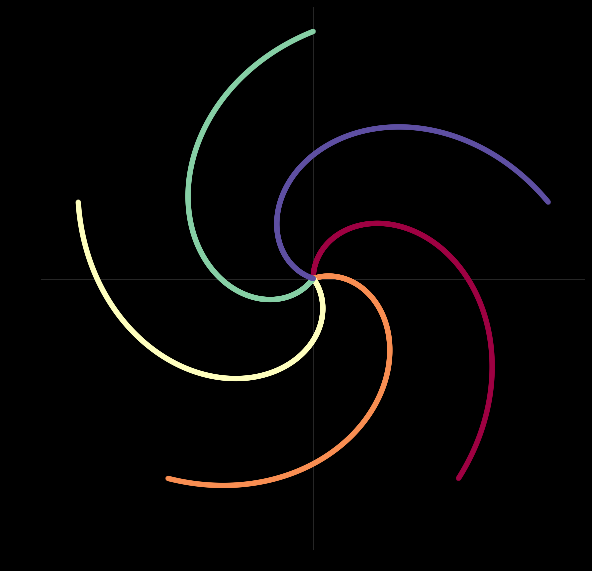

In [47]:
plot_data(train_x, train_y)

<h1 style="font-family:verdana;font-size:150%;text-align:left;color:#993333"> Part2: The Models </h1>

<h1 style="font-family:verdana;font-size:150%;text-align:Center;color:#993333"> Why using Neural Networks? </h1>

<h1 style="font-family:verdana;font-size:100%;text-align:left;color:#blue"> To answer this question let's first try with logisitc regression and observe the outcome.  </h1>

In [48]:
## nn.sequential defines a sequential computation graph
## nn.Linear defines a linear layer in the form of  (out= Ax +b) 

logistic_regression_model = nn.Sequential(
nn.Linear(in_features = 2, out_features = C, bias = True))
## optimizer is resonsilbe for taking the gradient and adding them to the model 
optimizer = optim.Adam(logistic_regression_model.parameters(), lr=1e-3)

n_epochs = 128
batch_size = 64

for i in range (n_epochs):
    for b in range(0, len(X), batch_size):
        predictions = logistic_regression_model(X[b:b+batch_size])

        loss = nn.CrossEntropyLoss()(predictions, y[b:b+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



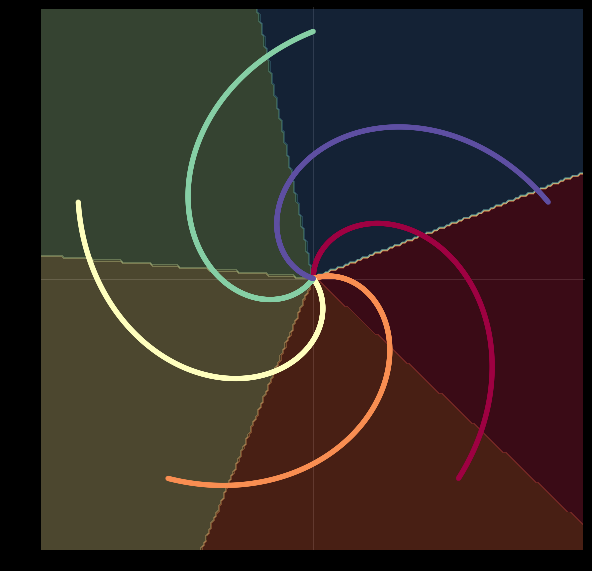

In [54]:
plot_model(train_x,train_y, logistic_regression_model)

<h1 style="font-family:verdana;font-size:100%;text-align:left;color:red"> Can you see the problem ?</h1>

<h1 style="font-family:verdana;font-size:150%;text-align:left;color:blue"> Now lets build the FeedForward model </h1>

#### first let's do it the hardway by inheriting from nn.Module class  



In [50]:
class NeuralClassifier(nn.Module):
    ## Here we put all the computations we need to make, order doesn't matter. 
    def __init__(self):
        super(NeuralClassifier, self).__init__()
        
        self.fc1 = nn.Linear(in_features=2, out_features = 5)
        self.fc2 = nn.Linear(in_features= 5, out_features= 10)
        self.fc3 = nn.Linear(in_features=10, out_features = 5)
        self.fc4 = nn.Linear(in_features=5, out_features = C)
        pass 
    
    ## Here we build our computation graph, there should be a logical order
    def forward(self, x):
        after_fc1 = self.fc1(x)
        after_fc1 = nn.Sigmoid()(after_fc1)
        
        after_fc2 = self.fc2(after_fc1)
        after_fc2 = nn.Sigmoid()(after_fc2)
        
        after_fc3 = self.fc3(after_fc2)
        after_fc3 = nn.Sigmoid()(after_fc3)
        
        after_fc4 = self.fc4(after_fc3)
        
        return after_fc4
        

In [51]:
neural_classifier = NeuralClassifier()

optimizer = optim.Adam(neural_classifier.parameters(), lr=1e-2)

n_epochs = 512
b_size = 512
for i in range (n_epochs):
    for b in range(0, len(X), batch_size):
        predictions = neural_classifier(X[b:b+batch_size])

        loss = nn.CrossEntropyLoss()(predictions, y[b:b+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

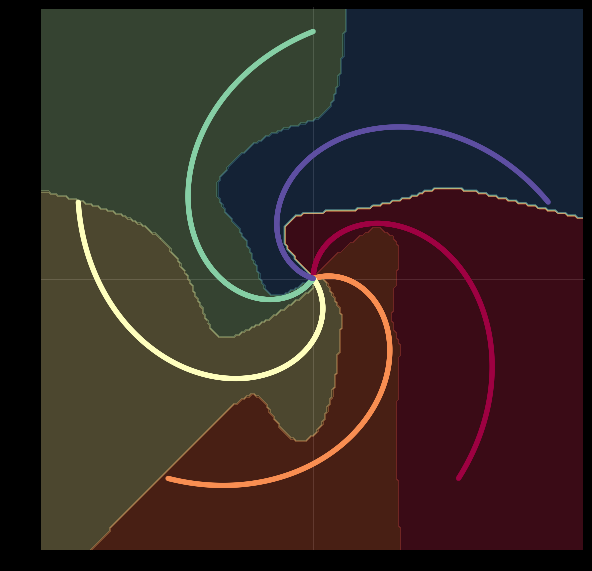

In [55]:
plot_model(train_x, train_y, neural_classifier)


<h1 style="font-family:verdana;font-size:100%;text-align:left;color:#663300">What do you notice about the decision boundary ?</h1>
<h1 style="font-family:verdana;font-size:100%;text-align:left;color:#663300">What's the difference between the feedforward classifier and the logitic regression (or softmax) classifiers ? </h1>



<h1 style="font-family:verdana;font-size:150%;text-align:center;background-color:#f2f2f2;color:#993333; border:2px; border-style:solid; border-color:gray; padding: 1em"> WHY ? </h1>

<h1 style="font-family:verdana;font-size:150%;text-align:left;color:#993333"> Part3: The Interpretation </h1>

<h1 style="font-family:verdana;font-size:120%;text-align:left;color:blue">× Input space prespective. </h1>
<h1 style="font-family:verdana;font-size:120%;text-align:left;color:blue">× Decision boundary prespective. </h1>




<h1 style="font-family:verdana;font-size:100%;text-align:center;color:blue"> Note about the optimiality </h1>
<p style="font-family:verdana;font-size:100%;text-align:left;color:black; border:3px; border-style:solid; border-color:gray; padding: 1em; "> 
Although the logisitc or softmax classifiers are linear in the feature space, they're optimal. i.e. we can find the global optima (the best possible linear classifier).
However, in Feedforward networks, we can generally find better classifiers, but we don't know if it's the best possible classifier or not and we don't know if our optima is the global optima or not, typically we get stuck in a local optima. 

</p>


<h1 style="font-family:verdana;font-size:200%;text-align:center;background-color:#f2f2f2; color:#00804d">wrap up and live coding</h1>